# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhammad Zikri Pasa
- **Email:** abangzikri45@gmail.com
- **ID Dicoding:** zikripasa

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Apa metode pembayaran yang paling sering digunakan?
- Pertanyaan 2 : Apakah keterlambatan pengiriman berpengaruh terhadap review pelanggan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
orders = pd.read_csv('/content/orders_dataset.csv')
payments = pd.read_csv('/content/order_payments_dataset.csv')
reviews = pd.read_csv('/content/order_reviews_dataset.csv')
products = pd.read_csv('/content/products_dataset.csv')
sellers = pd.read_csv('/content/sellers_dataset.csv')
customers = pd.read_csv('/content/customers_dataset.csv')
geolocation = pd.read_csv('/content/geolocation_dataset.csv')
order_items = pd.read_csv('/content/order_items_dataset.csv')
product_category_translation = pd.read_csv('/content/product_category_name_translation.csv')

**Insight:**
- xxx
- xxx

### Assessing Data

In [3]:
def check_data(df, name):
    print(f'\nDataset: {name}')
    print(df.info())
    print(df.head())
    print(f'Jumlah missing values:\n{df.isnull().sum()}')
    print('-'*50)

check_data(orders, 'Orders')
check_data(payments, 'Payments')
check_data(reviews, 'Reviews')



Dataset: Orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44

**Insight:**
- xxx
- xxx

### Cleaning Data

In [4]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders.dropna(subset=['order_delivered_customer_date'], inplace=True)

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...


Dataset: Orders

--- Deskripsi Kolom Numerik ---
            order_purchase_timestamp  order_delivered_customer_date  \
count                          96476                          96476   
mean   2018-01-01 22:44:47.156474368  2018-01-14 12:09:19.035542784   
min              2016-09-15 12:16:38            2016-10-11 13:46:32   
25%              2017-09-14 08:10:58  2017-09-25 22:07:22.249999872   
50%              2018-01-20 19:21:46     2018-02-02 19:28:10.500000   
75%    2018-05-05 18:28:21.750000128  2018-05-15 22:48:52.249999872   
max              2018-08-29 15:00:37            2018-10-17 13:22:46   
std                              NaN                            NaN   

       order_estimated_delivery_date  delivery_delay  
count                          96476    96476.000000  
mean   2018-01-25 16:27:14.993158656      -11.876881  
min              2016-10-04 00:00:00     -147.000000  
25%              2017-10-05 00:00:00      -17.000000  
50%              2018-02-16 00:00:0

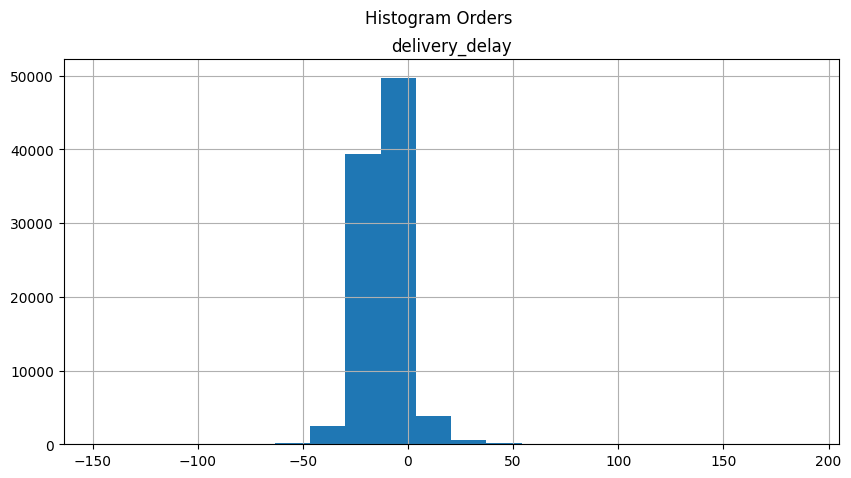


Dataset: Payments

--- Deskripsi Kolom Numerik ---
       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000

--- Deskripsi Kolom Kategori ---
                                order_id payment_type
count                             103886       103886
unique                             99440            5
top     fa65dad1b0e818e3ccc5cb0e39231352  credit_card
freq                                  29        76795


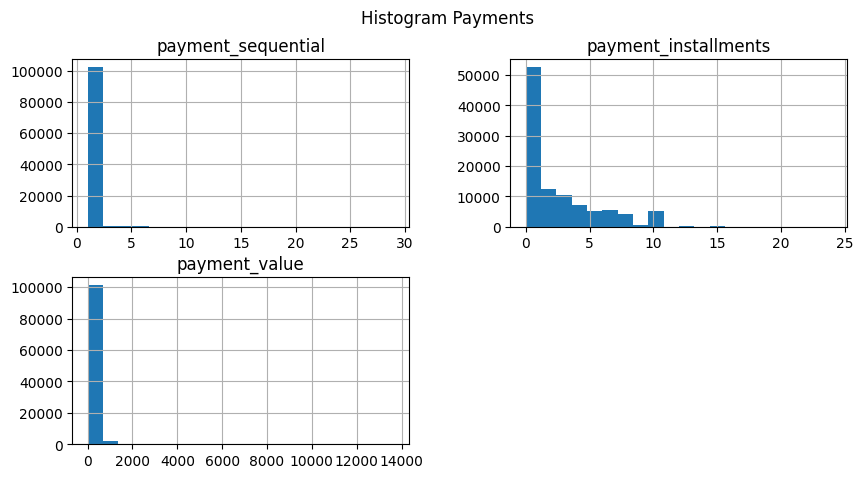


--- Korelasi Antar Kolom Numerik ---


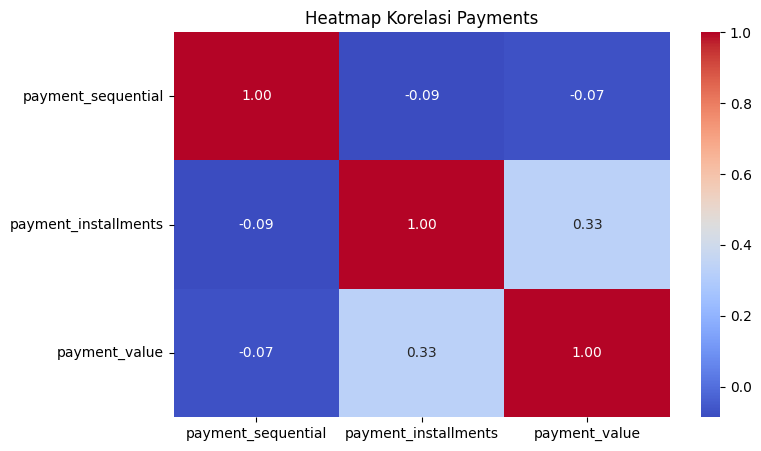


Dataset: Reviews

--- Deskripsi Kolom Numerik ---
       review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000

--- Deskripsi Kolom Kategori ---
                               review_id                          order_id  \
count                              99224                             99224   
unique                             98410                             98673   
top     7b606b0d57b078384f0b58eac1d41d78  c88b1d1b157a9999ce368f218a407141   
freq                                   3                                 3   

       review_comment_title review_comment_message review_creation_date  \
count                 11568                  40977                99224   
unique                 4527                  36159                  636   
top               Recomendo              Muito bom  2017-12-19 00:00:00   
freq                    423                 

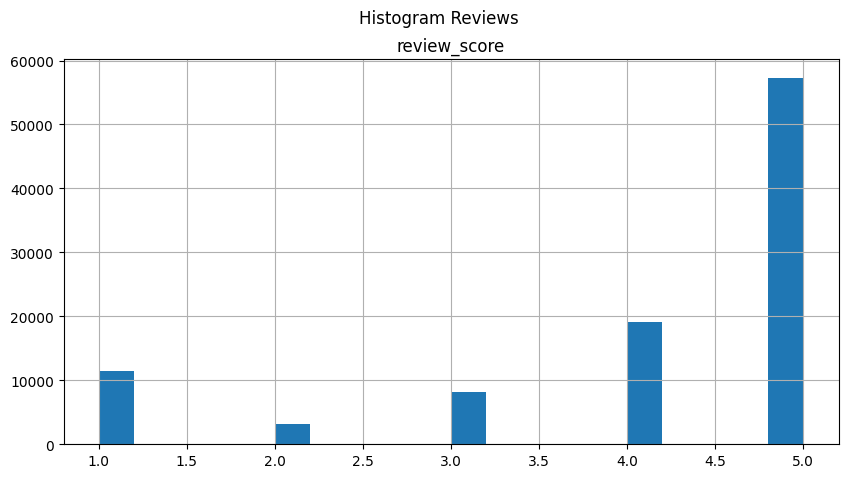

In [17]:


def check_data(df, name):
    print(f'\nDataset: {name}')


    print("\n--- Deskripsi Kolom Numerik ---")
    print(df.describe())

    print("\n--- Deskripsi Kolom Kategori ---")
    print(df.describe(include=['object']))

    # Histogram untuk kolom numerik
    numeric_cols = df.select_dtypes(include=['number']).columns
    if len(numeric_cols) > 0:
        df[numeric_cols].hist(figsize=(10, 5), bins=20)
        plt.suptitle(f'Histogram {name}')
        plt.show()

    # Korelasi untuk kolom numerik
    if len(numeric_cols) > 1:
        print("\n--- Korelasi Antar Kolom Numerik ---")
        plt.figure(figsize=(8, 5))
        sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
        plt.title(f'Heatmap Korelasi {name}')
        plt.show()


check_data(orders, 'Orders')
check_data(payments, 'Payments')
check_data(reviews, 'Reviews')


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa metode pembayaran yang paling sering digunakan?

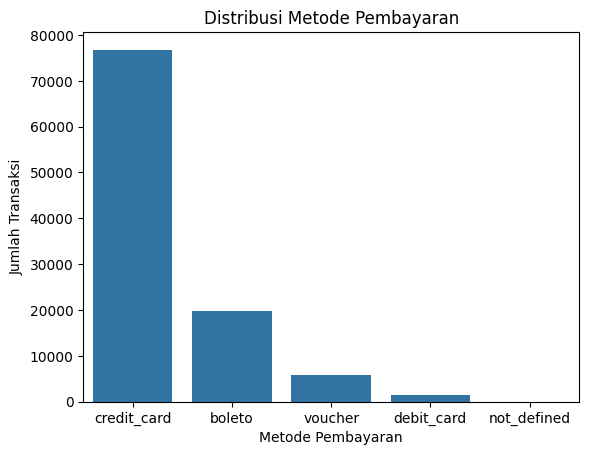

In [6]:
payment_counts = payments['payment_type'].value_counts()
sns.barplot(x=payment_counts.index, y=payment_counts.values)
plt.title('Distribusi Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Transaksi')
plt.show()

### Pertanyaan 2: Apakah keterlambatan pengiriman berpengaruh terhadap review pelanggan?

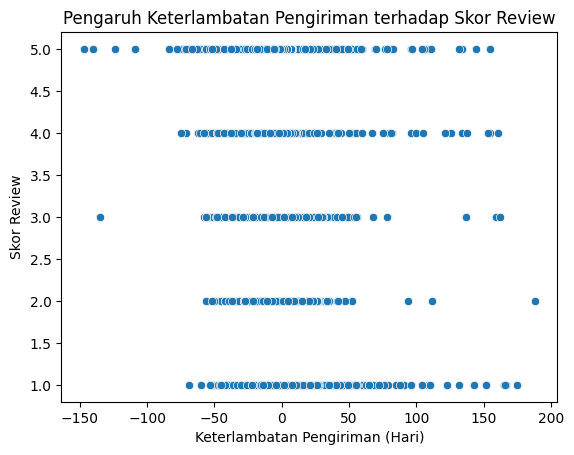

In [9]:
# Konversi kolom tanggal ke format datetime
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], errors='coerce')

# Hitung keterlambatan pengiriman
orders['delivery_delay'] = (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']).dt.days

merged_data = orders.merge(reviews, on='order_id')

# Visualisasi keterlambatan pengiriman vs skor review
sns.scatterplot(x=merged_data['delivery_delay'], y=merged_data['review_score'])
plt.title('Pengaruh Keterlambatan Pengiriman terhadap Skor Review')
plt.xlabel('Keterlambatan Pengiriman (Hari)')
plt.ylabel('Skor Review')
plt.show()


**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2

In [8]:
print('Kesimpulan:')
print('1. Metode pembayaran yang paling sering digunakan adalah:', payment_counts.idxmax())
print('2. Terdapat indikasi bahwa keterlambatan pengiriman berpengaruh terhadap skor review pelanggan.')

Kesimpulan:
1. Metode pembayaran yang paling sering digunakan adalah: credit_card
2. Terdapat indikasi bahwa keterlambatan pengiriman berpengaruh terhadap skor review pelanggan.
